# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
ride_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [5]:
# 2. Get the total drivers for each city type
drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]

In [6]:
#  3. Get the total amount of fares for each city type
fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_by_type = fares_by_city_type / ride_by_city_type

In [8]:
# 5. Get the average fare per driver for each city type. 
average_driver_fare = fares_by_city_type / drivers_by_city_type

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":ride_by_city_type,
                    "Total Drivers":drivers_by_city_type,
                    "Total Fares": fares_by_city_type,
                    "Average Fare Per Ride":average_fare_by_type,
                    "Average Fare Per Driver":average_driver_fare
                    })
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

# check dataframe
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [26]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
fares_by_date.head(10)

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
       2019-01-08 06:19:45    19.39
       2019-01-09 15:30:35    31.84
       2019-01-11 04:39:27    16.42
       2019-01-14 07:09:17    18.05
       2019-01-14 15:58:48    54.10
Name: fare, dtype: float64

In [28]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date = fares_by_date.reset_index()

In [31]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_pivot = fares_by_date.pivot(index="date", columns="type", values="fare")
fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [39]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
rides_2019_Jan_Apr = fares_pivot.loc["2019-01-01":"2019-04-30"]

In [40]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
rides_2019_Jan_Apr.index = pd.to_datetime(rides_2019_Jan_Apr.index)

In [179]:
# 7. Check that the datatype for the index is datetime using df.info()
rides_2019_Jan_Apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 133.9 KB


In [208]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Jan_Apr_weekly_data = rides_2019_Jan_Apr.resample("W", closed="left").sum()
Jan_Apr_weekly_data.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-07,440.75,863.00,2228.73
2019-04-14,318.34,870.60,2278.08
2019-04-21,207.54,1225.53,2506.16
2019-04-28,210.39,1198.97,2101.95
2019-05-05,67.60,356.63,671.41


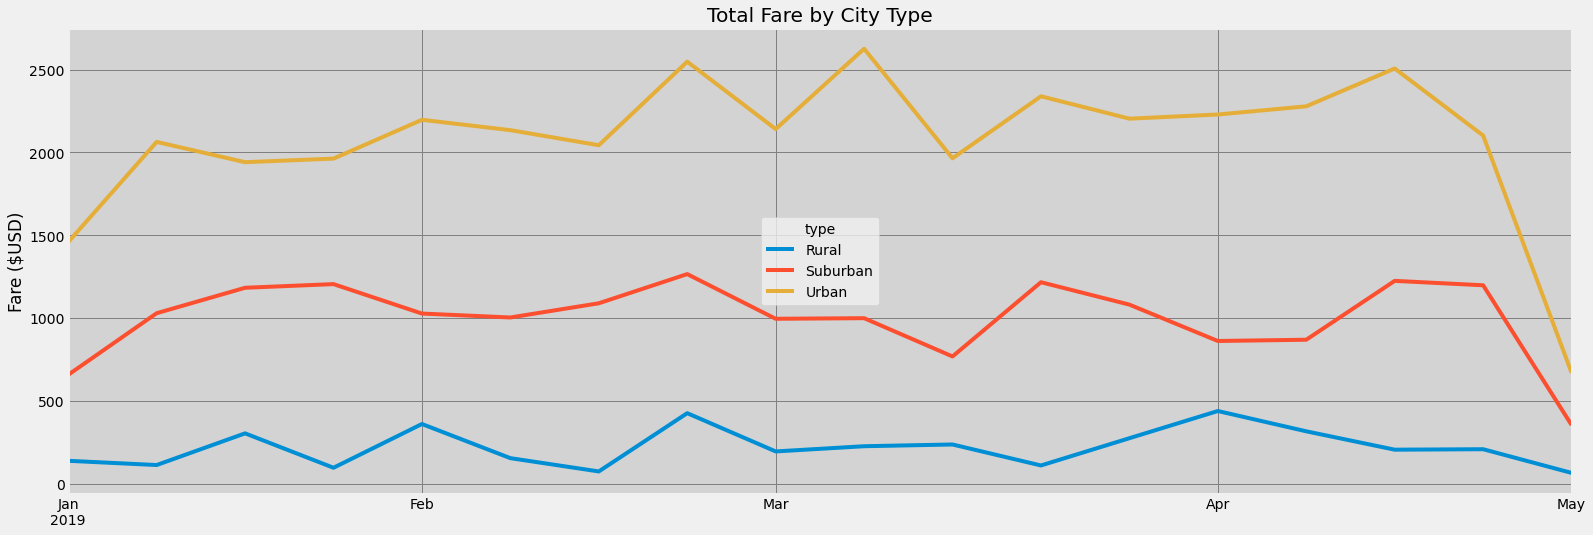

In [217]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# set x_axis
# x_axis = ["Jan", "Feb", "Mar", "Apr"]

# set data for y_axis
rural_fares = Jan_Apr_weekly_data["Rural"]
suburban_fares = Jan_Apr_weekly_data["Suburban"]
urban_fares = Jan_Apr_weekly_data["Urban"]
fare_data = [rural_fares, suburban_fares, urban_fares]

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# create fig and ax
fig, ax = plt.subplots(figsize=(24,8))
Jan_Apr_weekly_data.plot(ax=ax)
# # plot the fares by city type
# ax.plot(rural_fares, label="Rural")
# ax.plot(suburban_fares, label="Suburban")
# ax.plot(urban_fares, label="Urban")

# # change the x-axis labels to name of the month
# axis_months = mdates.MonthLocator(interval=1)
# ax.xaxis.set_major_locator(axis_months)
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
# # ax.set_xlim("2019-01-01", "2019-04-28")

# set title
ax.set_title("Total Fare by City Type")
# set y axis label
ax.set_ylabel("Fare ($USD)")
# remove x axis label
ax.set_xlabel("date", visible=False)
# change background color to gray
ax.set_facecolor("lightgray")
# put grid on chart
ax.grid(True, color="gray")
# add legend to chart
ax.legend(loc="center", title="type")
# save the chart output in analysis folder
plt.savefig("analysis/PyBer_fare_summary.png")